In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [87]:
print(tf.__version__)

2.8.0


In [88]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

In [89]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [90]:
df = pd.read_excel('/content/drive/MyDrive/skripsi ghanes/dataset-fix.xlsx', sheet_name='fix')
df.head()

,Kebijakan,Periode (hari),Revenue,Tanggal
0,PSBB,10.0,1.561507e+11,2020-04-10
1,PSBB,2.0,6.774117e+11,2020-04-12
2,PSBB,8.0,1.472724e+11,2020-04-20
3,PSBB,5.0,1.832997e+11,2020-04-25
4,PSBB,5.0,8.791090e+11,2020-04-30


In [91]:
revenue_scaler = StandardScaler()

revenue_scaled = revenue_scaler.fit_transform(df['Revenue'].values.reshape(-1,1))
df['Revenue Scaled'] = revenue_scaled
df.head()

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
0,PSBB,10.0,1.561507e+11,2020-04-10,-0.334089
1,PSBB,2.0,6.774117e+11,2020-04-12,1.572951
2,PSBB,8.0,1.472724e+11,2020-04-20,-0.366570
3,PSBB,5.0,1.832997e+11,2020-04-25,-0.234764
4,PSBB,5.0,8.791090e+11,2020-04-30,2.310863


In [92]:
df['Kebijakan'].unique()

array(['PSBB', 'PSBB  TRANSISI', 'PSBB KETAT', 'PSBB  TRANSISI FASE 2',
       'PPKM', 'PPKM  MIKRO', 'PPKM DARURAT', 'PPKM LEVEL 3 & 4',
       'PPKM LEVEL 2, 3, & 4', 'PPKM  LEVEL 1, 2, & 3'], dtype=object)

# Model with Periode as Feature

## PSBB

In [93]:
df_psbb = df[df['Kebijakan'] == 'PSBB']
df_psbb

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
0,PSBB,10.0,1.561507e+11,2020-04-10,-0.334089
1,PSBB,2.0,6.774117e+11,2020-04-12,1.572951
2,PSBB,8.0,1.472724e+11,2020-04-20,-0.366570
3,PSBB,5.0,1.832997e+11,2020-04-25,-0.234764
4,PSBB,5.0,8.791090e+11,2020-04-30,2.310863
5,PSBB,10.0,1.474547e+11,2020-05-10,-0.365904
6,PSBB,8.0,1.760403e+11,2020-05-18,-0.261323
7,PSBB,7.0,1.758892e+11,2020-05-25,-0.261876
8,PSBB,7.0,1.432047e+11,2020-06-01,-0.381452
9,PSBB,2.0,4.195147e+11,2020-06-03,0.629431


In [94]:
feature_psbb_1 = df_psbb['Periode (hari)']
revenue_psbb_1 = df_psbb['Revenue Scaled']

feature_psbb_1.shape, revenue_psbb_1.shape

((10,), (10,))

### Model

In [95]:
tf.random.set_seed(42)


# Build the model 
model_psbb_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_psbb_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_psbb_1 = model_psbb_1.fit(feature_psbb_1, revenue_psbb_1, batch_size=32, epochs=100, verbose=0, validation_split=0.3, shuffle=False) 

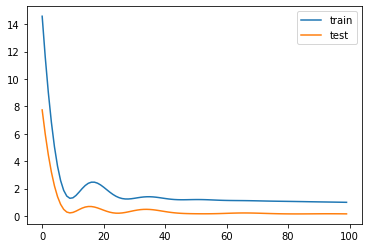

In [96]:
plt.plot(history_psbb_1.history['loss'], label='train')
plt.plot(history_psbb_1.history['val_loss'], label='test')
plt.legend();

### Evaluation

In [97]:
revenUe_psbb_pred_1 = model_psbb_1.predict(feature_psbb_1)
revenUe_psbb_pred_1

array([[-0.01748252],
       [ 0.26692498],
       [ 0.05361921],
       [ 0.16027218],
       [ 0.16027218],
       [-0.01748252],
       [ 0.05361921],
       [ 0.08917048],
       [ 0.08917048],
       [ 0.26692498]], dtype=float32)

In [98]:
revenue_psbb_1 = revenue_psbb_1.to_numpy()
revenue_psbb_1

array([-0.33408906,  1.5729506 , -0.36657031, -0.23476395,  2.3108625 ,
       -0.36590357, -0.26132273, -0.26187564, -0.38145209,  0.62943115])

In [99]:
revenue_psbb_1_inv = revenue_scaler.inverse_transform(revenue_psbb_1.reshape(-1,1))
revenue_psbb_1_pred_inv = revenue_scaler.inverse_transform(revenUe_psbb_pred_1)
revenue_psbb_1_inv.shape, revenue_psbb_1_pred_inv.shape 

((10, 1), (10, 1))

In [100]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test.squeeze(),
                                        y_pred.squeeze()).numpy()
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test.squeeze(),
                                       y_pred.squeeze()).numpy()

In [101]:
MSE_psbb_1_Standard = mse(revenue_psbb_1_inv, revenue_psbb_1_pred_inv)
MAE_psbb_1_Standard = mae(revenue_psbb_1_inv, revenue_psbb_1_pred_inv)

print(f'Mean Squared Error : {MSE_psbb_1_Standard}')
print(f'Mean Absolute Error : {MAE_psbb_1_Standard}')

Mean Squared Error : 5.5737548787454535e+22
Mean Absolute Error : 175918120960.0


### Visualization

In [102]:
def plot_predictions(date_df ,real_data, predictions, title, subtitle):
  """
  Plots real data vs prediction.
  """
  df = date_df
  df['Revenue'] = real_data
  df['Revenue Prediction'] = predictions

  fig, ax = plt.subplots(figsize=(14, 8), dpi=75)
  line_real_data = ax.plot(df['Tanggal'], df['Revenue'], alpha=1, marker='o', color=colors_blue[3], linewidth=3, label='Real Data')
  line_prediction_data = ax.plot(df['Tanggal'], df['Revenue Prediction'], alpha=1, marker='x', color=colors_red[3], linewidth=3, label='Predictions')
  
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12)
  ax.grid(axis='y', alpha=0.3)
  ax.set_axisbelow(True)
  # ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
  ax.set_ylabel("Revenue", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

  xmin, xmax = ax.get_xlim()
  ymin, ymax = ax.get_ylim()
  plt.text(s=title, ha='left', x=xmin, y=ymax*1.1, fontsize=24, fontweight='bold', color=colors_dark[0])
  plt.title(subtitle, loc='left', fontsize=13, color=colors_dark[2])  
  plt.tight_layout()
  plt.show()

In [103]:
revenue_psbb_1_inv = revenue_psbb_1_inv.squeeze()
revenue_psbb_1_pred_inv = revenue_psbb_1_pred_inv.squeeze()
date_psbb_1 = df_psbb['Tanggal']
date_psbb_1 = date_psbb_1.to_frame()

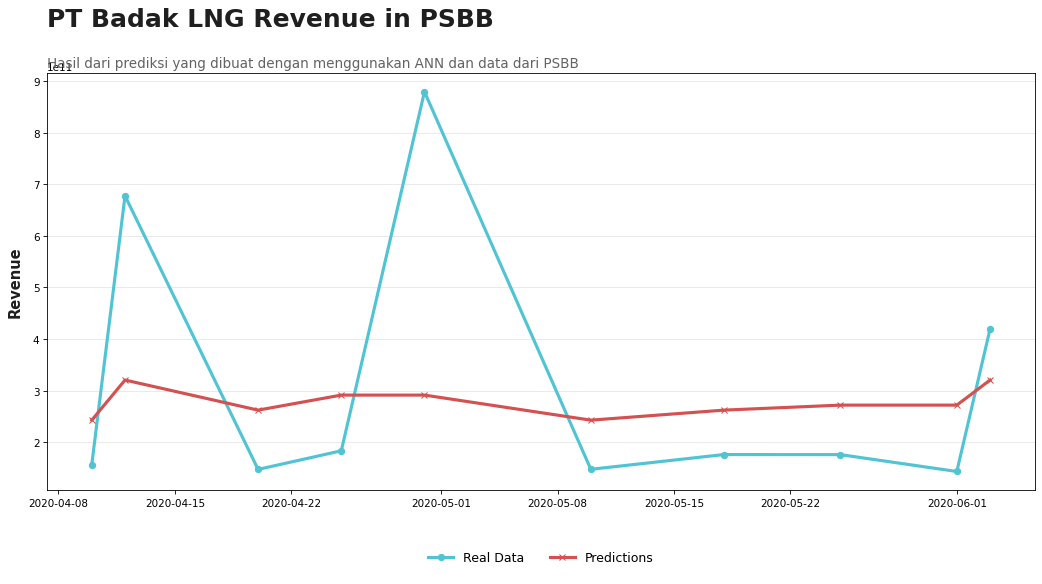

In [104]:
title_ann_standard = 'PT Badak LNG Revenue in PSBB'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN dan data dari PSBB'
plot_predictions(date_psbb_1,revenue_psbb_1_inv, revenue_psbb_1_pred_inv, title_ann_standard, subtitle_ann_standard)

## PSBB TRANSISI

In [105]:
df_psbb_trans = df[df['Kebijakan'] == 'PSBB  TRANSISI']
df_psbb_trans

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
10,PSBB TRANSISI,10.0,6.358678e+11,2020-06-13,1.420962
11,PSBB TRANSISI,8.0,1.857537e+11,2020-06-21,-0.225786
12,PSBB TRANSISI,11.0,1.973245e+11,2020-07-02,-0.183454
13,PSBB TRANSISI,5.0,9.416419e+11,2020-07-07,2.539640
14,PSBB TRANSISI,8.0,1.087409e+12,2020-07-15,3.072929
15,PSBB TRANSISI,11.0,1.356611e+11,2020-07-26,-0.409050
16,PSBB TRANSISI,13.0,1.476348e+11,2020-08-08,-0.365245
17,PSBB TRANSISI,9.0,5.442950e+11,2020-08-17,1.085942
18,PSBB TRANSISI,2.0,9.656752e+11,2020-08-19,2.627566
19,PSBB TRANSISI,15.0,8.314508e+10,2020-09-03,-0.601181


In [106]:
feature_psbb_trans_1 = df_psbb_trans['Periode (hari)']
revenue_psbb_trans_1 = df_psbb_trans['Revenue Scaled']

feature_psbb_trans_1.shape, revenue_psbb_trans_1.shape

((10,), (10,))

### Model

In [107]:
tf.random.set_seed(42)


# Build the model 
model_psbb_trans_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_psbb_trans_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_psbb_trans_1 = model_psbb_trans_1.fit(feature_psbb_trans_1, revenue_psbb_trans_1, batch_size=32, epochs=100, verbose=0, validation_split=0.3, shuffle=False) 

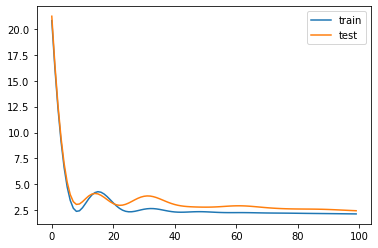

In [108]:
plt.plot(history_psbb_trans_1.history['loss'], label='train')
plt.plot(history_psbb_trans_1.history['val_loss'], label='test')
plt.legend();

### Evaluation

In [109]:
revenUe_psbb_trans_pred_1 = model_psbb_trans_1.predict(feature_psbb_trans_1)
revenUe_psbb_trans_pred_1

array([[0.5777243 ],
       [0.5148073 ],
       [0.6091837 ],
       [0.4204304 ],
       [0.5148073 ],
       [0.6091837 ],
       [0.6721019 ],
       [0.54626566],
       [0.32605362],
       [0.73502004]], dtype=float32)

In [110]:
revenue_psbb_trans_1 = revenue_psbb_trans_1.to_numpy()
revenue_psbb_trans_1

array([ 1.42096156, -0.22578601, -0.18345437,  2.5396399 ,  3.0729288 ,
       -0.40905037, -0.36524472,  1.08594153,  2.62756614, -0.60118098])

In [111]:
revenue_psbb_trans_1_inv = revenue_scaler.inverse_transform(revenue_psbb_trans_1.reshape(-1,1))
revenue_psbb_trans_1_pred_inv = revenue_scaler.inverse_transform(revenUe_psbb_trans_pred_1)
revenue_psbb_trans_1_inv.shape, revenue_psbb_trans_1_pred_inv.shape 

((10, 1), (10, 1))

In [112]:
MSE_psbb_trans_1_Standard = mse(revenue_psbb_trans_1_inv, revenue_psbb_trans_1_pred_inv)
MAE_psbb_trans_1_Standard = mae(revenue_psbb_trans_1_inv, revenue_psbb_trans_1_pred_inv)

print(f'Mean Squared Error : {MSE_psbb_trans_1_Standard}')
print(f'Mean Absolute Error : {MAE_psbb_trans_1_Standard}')

Mean Squared Error : 1.674251351999822e+23
Mean Absolute Error : 363174166528.0


### Visualization

In [113]:
revenue_psbb_trans_1_inv = revenue_psbb_trans_1_inv.squeeze()
revenue_psbb__trans_1_pred_inv = revenue_psbb_trans_1_pred_inv.squeeze()
date_psbb_trans_1 = df_psbb_trans['Tanggal']
date_psbb_trans_1 = date_psbb_trans_1.to_frame()

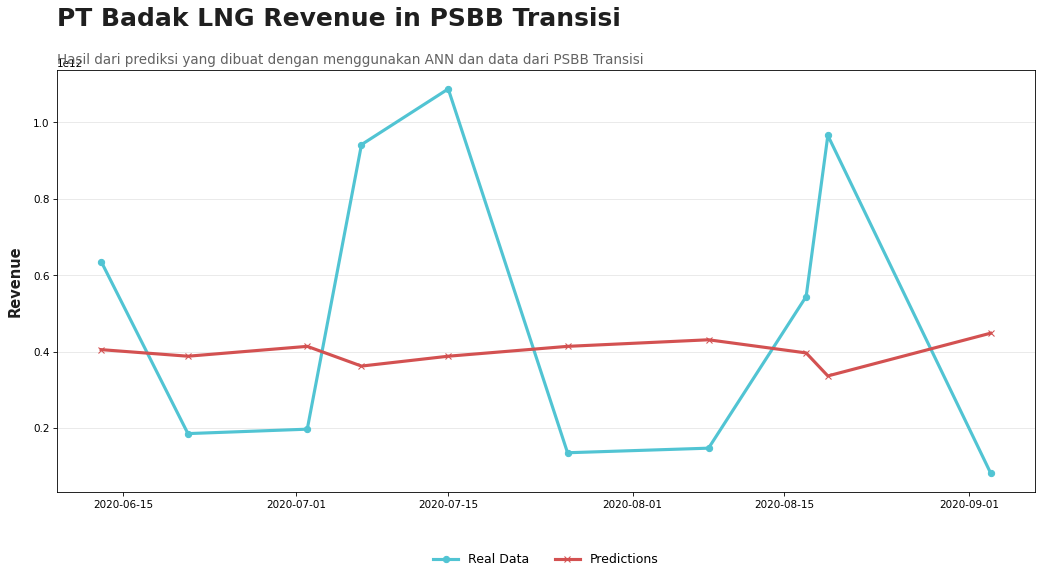

In [114]:
title_ann_standard = 'PT Badak LNG Revenue in PSBB Transisi'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN dan data dari PSBB Transisi'
plot_predictions(date_psbb_trans_1,revenue_psbb_trans_1_inv, revenue_psbb__trans_1_pred_inv, title_ann_standard, subtitle_ann_standard)

## PSBB KETAT

In [115]:
df_psbb_k = df[df['Kebijakan'] == 'PSBB KETAT']
df_psbb_k

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
20,PSBB KETAT,9.0,1.155736e+11,2020-09-12,-0.482541
21,PSBB KETAT,6.0,8.324162e+10,2020-09-18,-0.600828
22,PSBB KETAT,5.0,7.156432e+10,2020-09-23,-0.643549
23,PSBB KETAT,2.0,6.962526e+11,2020-09-25,1.641880
24,PSBB KETAT,3.0,3.823324e+11,2020-09-28,0.493399
25,PSBB KETAT,5.0,9.670782e+10,2020-10-03,-0.551562
26,PSBB KETAT,6.0,3.794796e+11,2020-10-09,0.482962
27,PSBB KETAT,2.0,3.770154e+11,2020-10-11,0.473947


In [116]:
feature_psbb_k_1 = df_psbb_k['Periode (hari)']
revenue_psbb_k_1 = df_psbb_k['Revenue Scaled']

feature_psbb_k_1.shape, revenue_psbb_k_1.shape

((8,), (8,))

### Model

In [117]:
tf.random.set_seed(42)


# Build the model 
model_psbb_k_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_psbb_k_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_psbb_k_1 = model_psbb_k_1.fit(feature_psbb_k_1, revenue_psbb_k_1, batch_size=32, epochs=100, verbose=0, validation_split=0.3, shuffle=False) 

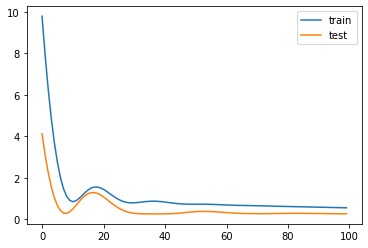

In [118]:
plt.plot(history_psbb_k_1.history['loss'], label='train')
plt.plot(history_psbb_k_1.history['val_loss'], label='test')
plt.legend();

### Evaluation

In [119]:
revenUe_psbb_k_pred_1 = model_psbb_k_1.predict(feature_psbb_k_1)
revenUe_psbb_k_pred_1

array([[-0.5094278 ],
       [-0.20986319],
       [-0.11000819],
       [ 0.1895556 ],
       [ 0.08970103],
       [-0.11000819],
       [-0.20986313],
       [ 0.18955559]], dtype=float32)

In [120]:
revenue_psbb_k_1 = revenue_psbb_k_1.to_numpy()
revenue_psbb_k_1

array([-0.48254088, -0.60082778, -0.64354933,  1.64188024,  0.49339939,
       -0.55156153,  0.48296249,  0.47394721])

In [121]:
revenue_psbb_k_1_inv = revenue_scaler.inverse_transform(revenue_psbb_k_1.reshape(-1,1))
revenue_psbb_k_1_pred_inv = revenue_scaler.inverse_transform(revenUe_psbb_k_pred_1)
revenue_psbb_k_1_inv.shape, revenue_psbb_k_1_pred_inv.shape 

((8, 1), (8, 1))

In [122]:
MSE_psbb_k_1_Standard = mse(revenue_psbb_k_1_inv, revenue_psbb_k_1_pred_inv)
MAE_psbb_k_1_Standard = mae(revenue_psbb_k_1_inv, revenue_psbb_k_1_pred_inv)

print(f'Mean Squared Error : {MSE_psbb_k_1_Standard}')
print(f'Mean Absolute Error : {MAE_psbb_k_1_Standard}')

Mean Squared Error : 3.237198671152981e+22
Mean Absolute Error : 144395681792.0


### Visualization

In [123]:
revenue_psbb_k_1_inv = revenue_psbb_k_1_inv.squeeze()
revenue_psbb__k_1_pred_inv = revenue_psbb_k_1_pred_inv.squeeze()
date_psbb_k_1 = df_psbb_k['Tanggal']
date_psbb_k_1 = date_psbb_k_1.to_frame()

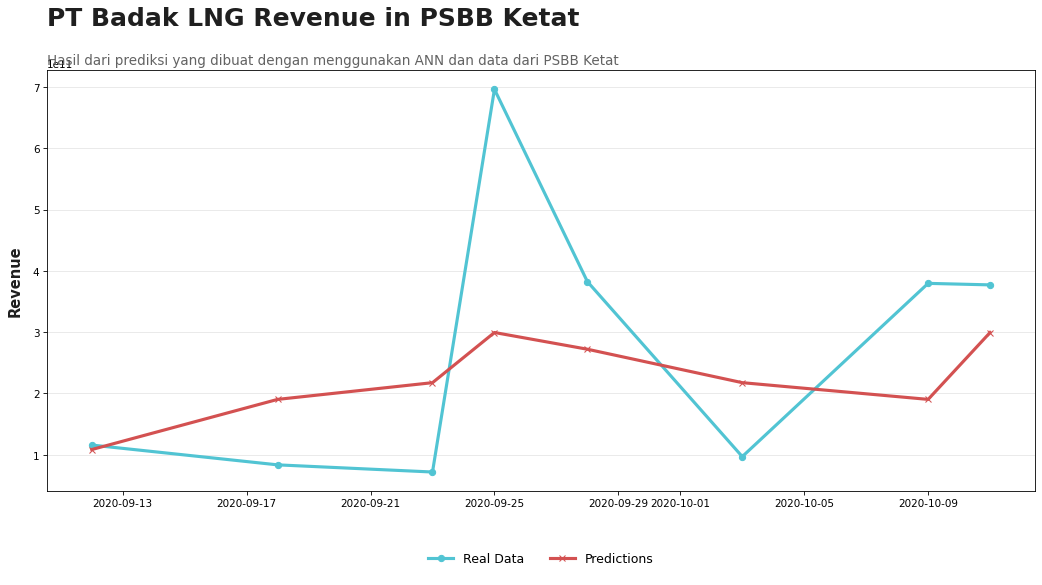

In [124]:
title_ann_standard = 'PT Badak LNG Revenue in PSBB Ketat'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN dan data dari PSBB Ketat'
plot_predictions(date_psbb_k_1,revenue_psbb_k_1_inv, revenue_psbb__k_1_pred_inv, title_ann_standard, subtitle_ann_standard)

## PSBB TRANSISI FASE 2

In [125]:
df_psbb_tf2 = df[df['Kebijakan'] == 'PSBB  TRANSISI FASE 2']
df_psbb_tf2

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
28,PSBB TRANSISI FASE 2,9.0,1.893239e+11,2020-10-20,-0.212725
29,PSBB TRANSISI FASE 2,7.0,1.491147e+11,2020-10-27,-0.359831
30,PSBB TRANSISI FASE 2,7.0,8.000991e+10,2020-11-03,-0.612651
31,PSBB TRANSISI FASE 2,6.0,1.874729e+11,2020-11-09,-0.219496
32,PSBB TRANSISI FASE 2,4.0,2.171203e+11,2020-11-13,-0.111031
33,PSBB TRANSISI FASE 2,7.0,7.344057e+10,2020-11-20,-0.636685
34,PSBB TRANSISI FASE 2,5.0,6.675399e+11,2020-11-25,1.536835
35,PSBB TRANSISI FASE 2,10.0,9.461185e+10,2020-12-05,-0.559230
36,PSBB TRANSISI FASE 2,15.0,4.613398e+10,2020-12-20,-0.736587
37,PSBB TRANSISI FASE 2,5.0,1.520857e+11,2020-12-25,-0.348961


In [126]:
feature_psbb_tf2_1 = df_psbb_tf2['Periode (hari)']
revenue_psbb_tf2_1 = df_psbb_tf2['Revenue Scaled']

feature_psbb_tf2_1.shape, revenue_psbb_tf2_1.shape

((10,), (10,))

### Model

In [127]:
tf.random.set_seed(42)


# Build the model 
model_psbb_tf2_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_psbb_tf2_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_psbb_tf2_1 = model_psbb_tf2_1.fit(feature_psbb_tf2_1, revenue_psbb_tf2_1, batch_size=32, epochs=100, verbose=0, validation_split=0.3, shuffle=False) 

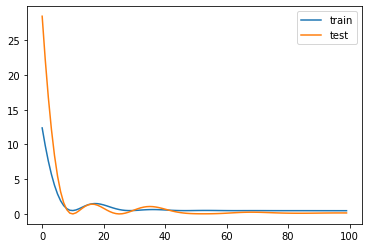

In [128]:
plt.plot(history_psbb_tf2_1.history['loss'], label='train')
plt.plot(history_psbb_tf2_1.history['val_loss'], label='test')
plt.legend();

### Evaluation

In [129]:
revenUe_psbb_tf2_pred_1 = model_psbb_tf2_1.predict(feature_psbb_tf2_1)
revenUe_psbb_tf2_pred_1

array([[-0.173417  ],
       [-0.14505604],
       [-0.14505604],
       [-0.1308755 ],
       [-0.10251407],
       [-0.14505604],
       [-0.11669458],
       [-0.18759793],
       [-0.25850105],
       [-0.11669458]], dtype=float32)

In [130]:
revenue_psbb_tf2_1 = revenue_psbb_tf2_1.to_numpy()
revenue_psbb_tf2_1

array([-0.21272466, -0.3598305 , -0.61265103, -0.21949649, -0.11103115,
       -0.63668505,  1.53683462, -0.55922966, -0.73658654, -0.34896103])

In [131]:
revenue_psbb_tf2_1_inv = revenue_scaler.inverse_transform(revenue_psbb_tf2_1.reshape(-1,1))
revenue_psbb_tf2_1_pred_inv = revenue_scaler.inverse_transform(revenUe_psbb_tf2_pred_1)
revenue_psbb_tf2_1_inv.shape, revenue_psbb_tf2_1_pred_inv.shape 

((10, 1), (10, 1))

In [132]:
MSE_psbb_tf2_1_Standard = mse(revenue_psbb_tf2_1_inv, revenue_psbb_tf2_1_pred_inv)
MAE_psbb_tf2_1_Standard = mae(revenue_psbb_tf2_1_inv, revenue_psbb_tf2_1_pred_inv)

print(f'Mean Squared Error : {MSE_psbb_tf2_1_Standard}')
print(f'Mean Absolute Error : {MAE_psbb_tf2_1_Standard}')

Mean Squared Error : 2.742477126186425e+22
Mean Absolute Error : 110590246912.0


### Visualization

In [133]:
revenue_psbb_tf2_1_inv = revenue_psbb_tf2_1_inv.squeeze()
revenue_psbb__tf2_1_pred_inv = revenue_psbb_tf2_1_pred_inv.squeeze()
date_psbb_tf2_1 = df_psbb_tf2['Tanggal']
date_psbb_tf2_1 = date_psbb_tf2_1.to_frame()

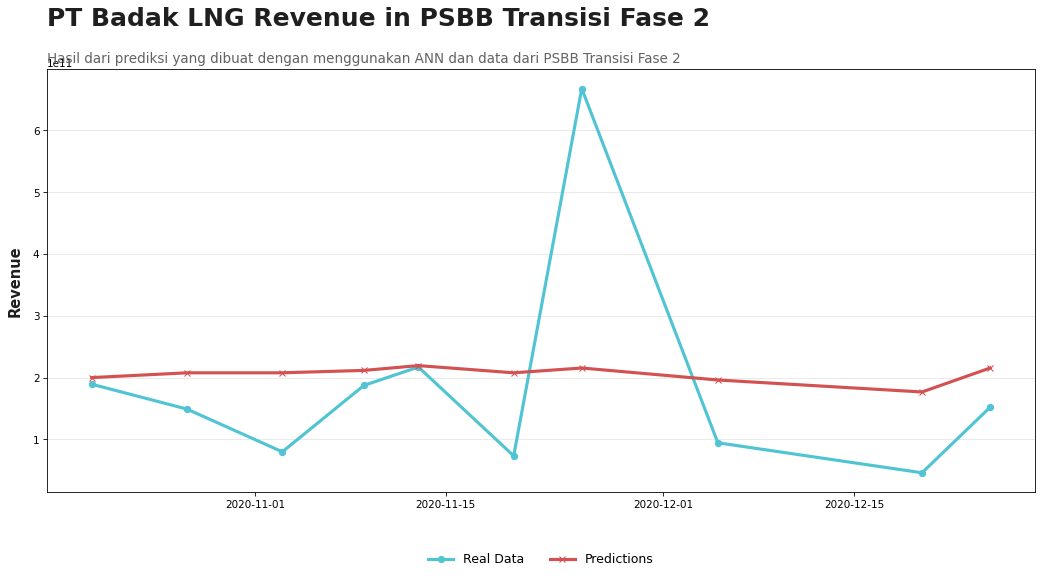

In [134]:
title_ann_standard = 'PT Badak LNG Revenue in PSBB Transisi Fase 2'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN dan data dari PSBB Transisi Fase 2'
plot_predictions(date_psbb_tf2_1,revenue_psbb_tf2_1_inv, revenue_psbb__tf2_1_pred_inv, title_ann_standard, subtitle_ann_standard)

## PPKM

In [135]:
df_ppkm = df[df['Kebijakan'] == 'PPKM']
df_ppkm

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
38,PPKM,7.0,7.015936e+10,2021-01-06,-0.648689
39,PPKM,2.0,1.059919e+12,2021-01-08,2.972357
40,PPKM,5.0,8.244473e+10,2021-01-13,-0.603743
41,PPKM,8.0,6.036486e+10,2021-01-21,-0.684523
42,PPKM,2.0,7.427046e+11,2021-01-23,1.811825
43,PPKM,9.0,1.100094e+11,2021-02-01,-0.502898
44,PPKM,2.0,6.009249e+11,2021-02-03,1.293123
45,PPKM,5.0,5.233691e+10,2021-02-08,-0.713893


In [136]:
feature_ppkm_1 = df_ppkm['Periode (hari)']
revenue_ppkm_1 = df_ppkm['Revenue Scaled']

feature_ppkm_1.shape, revenue_ppkm_1.shape

((8,), (8,))

### Model

In [137]:
tf.random.set_seed(42)


# Build the model 
model_ppkm_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_ppkm_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_ppkm_1 = model_ppkm_1.fit(feature_ppkm_1, revenue_ppkm_1, batch_size=32, epochs=100, verbose=0, validation_split=0.3, shuffle=False) 

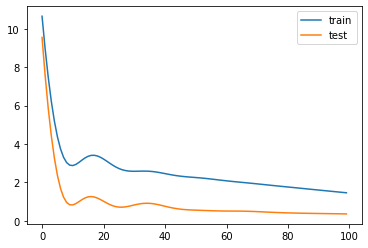

In [138]:
plt.plot(history_ppkm_1.history['loss'], label='train')
plt.plot(history_ppkm_1.history['val_loss'], label='test')
plt.legend();

### Evaluation|

In [139]:
revenUe_ppkm_pred_1 = model_ppkm_1.predict(feature_ppkm_1)
revenUe_ppkm_pred_1

array([[-0.29043588],
       [ 0.67920053],
       [ 0.09741885],
       [-0.48436287],
       [ 0.67920053],
       [-0.6782902 ],
       [ 0.6792004 ],
       [ 0.0974187 ]], dtype=float32)

In [140]:
revenue_ppkm_1 = revenue_ppkm_1.to_numpy()
revenue_ppkm_1

array([-0.6486894 ,  2.97235679, -0.60374322, -0.68452268,  1.81182541,
       -0.50289766,  1.29312264, -0.71389304])

In [141]:
revenue_ppkm_1_inv = revenue_scaler.inverse_transform(revenue_ppkm_1.reshape(-1,1))
revenue_ppkm_1_pred_inv = revenue_scaler.inverse_transform(revenUe_ppkm_pred_1)
revenue_ppkm_1_inv.shape, revenue_ppkm_1_pred_inv.shape 

((8, 1), (8, 1))

In [142]:
MSE_ppkm_1_Standard = mse(revenue_ppkm_1_inv, revenue_ppkm_1_pred_inv)
MAE_ppkm_1_Standard = mae(revenue_ppkm_1_inv, revenue_ppkm_1_pred_inv)

print(f'Mean Squared Error : {MSE_ppkm_1_Standard}')
print(f'Mean Absolute Error : {MAE_ppkm_1_Standard}')

Mean Squared Error : 7.720873923412027e+22
Mean Absolute Error : 214772531200.0


### Visualization

In [143]:
revenue_ppkm_1_inv = revenue_ppkm_1_inv.squeeze()
revenue_ppkm_1_pred_inv = revenue_ppkm_1_pred_inv.squeeze()
date_ppkm_1 = df_ppkm['Tanggal']
date_ppkm_1 = date_ppkm_1.to_frame()

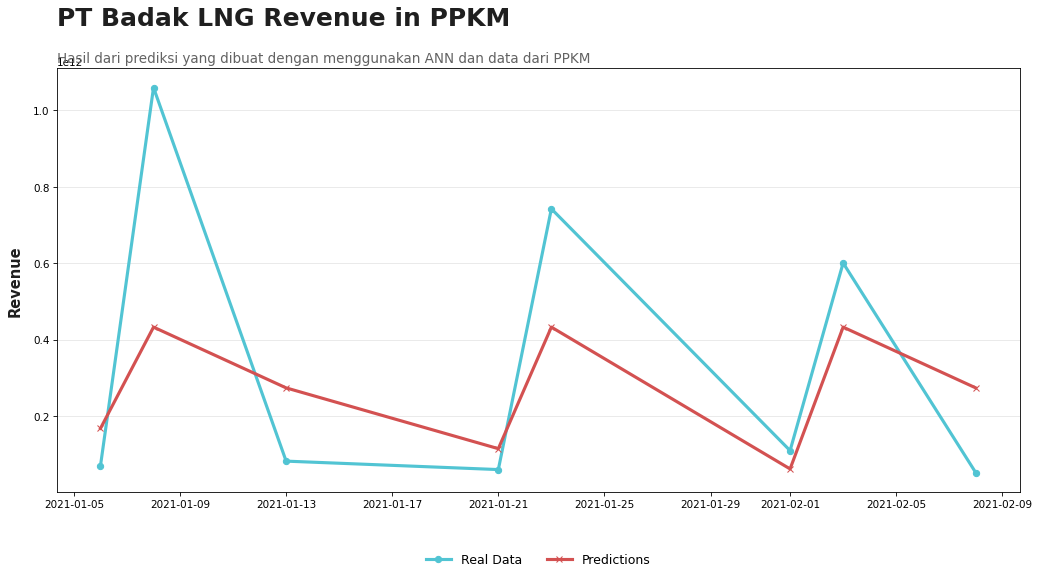

In [144]:
title_ann_standard = 'PT Badak LNG Revenue in PPKM'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN dan data dari PPKM'
plot_predictions(date_ppkm_1,revenue_ppkm_1_inv, revenue_ppkm_1_pred_inv, title_ann_standard, subtitle_ann_standard)

## PPKM  MIKRO

In [146]:
df_ppkm_mikro = df[df['Kebijakan'] == 'PPKM  MIKRO']
df_ppkm_mikro

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
46,PPKM MIKRO,6.0,7.329621e+10,2021-02-14,-0.637213
47,PPKM MIKRO,4.0,1.576696e+11,2021-02-18,-0.328532
48,PPKM MIKRO,3.0,5.125515e+11,2021-02-21,0.969807
49,PPKM MIKRO,3.0,4.387788e+11,2021-02-24,0.699909
50,PPKM MIKRO,5.0,6.246732e+10,2021-03-01,-0.676831
51,PPKM MIKRO,3.0,4.248789e+11,2021-03-04,0.649056
52,PPKM MIKRO,6.0,1.577392e+11,2021-03-10,-0.328278
53,PPKM MIKRO,12.0,3.228827e+10,2021-03-22,-0.787241
54,PPKM MIKRO,4.0,3.563277e+11,2021-03-26,0.398261
55,PPKM MIKRO,5.0,4.487700e+11,2021-03-31,0.736462


In [147]:
feature_ppkm_mikro_1 = df_ppkm_mikro['Periode (hari)']
revenue_ppkm_mikro_1 = df_ppkm_mikro['Revenue Scaled']

feature_ppkm_mikro_1.shape, revenue_ppkm_mikro_1.shape

((25,), (25,))

### Model

In [155]:
tf.random.set_seed(42)


# Build the model 
model_ppkm_mikro_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_ppkm_mikro_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_ppkm_mikro_1 = model_ppkm_mikro_1.fit(feature_ppkm_mikro_1, revenue_ppkm_mikro_1, batch_size=32, epochs=100, verbose=0, validation_split=0.3, shuffle=False)

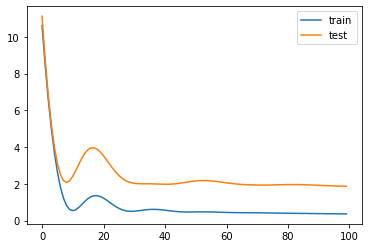

In [156]:
plt.plot(history_ppkm_mikro_1.history['loss'], label='train')
plt.plot(history_ppkm_mikro_1.history['val_loss'], label='test')
plt.legend();

### Evaluation

In [157]:
revenUe_ppkm_mikro_pred_1 = model_ppkm_mikro_1.predict(feature_ppkm_mikro_1)
revenUe_ppkm_mikro_pred_1

array([[-0.16036215],
       [-0.0217947 ],
       [ 0.04748916],
       [ 0.04748916],
       [-0.09107822],
       [ 0.04748916],
       [-0.16036215],
       [-0.5760654 ],
       [-0.0217947 ],
       [-0.09107822],
       [-0.0217947 ],
       [ 0.11677295],
       [-0.4374971 ],
       [ 0.04748916],
       [-0.09107822],
       [-0.4374971 ],
       [-0.09107822],
       [-0.5067817 ],
       [-0.0217947 ],
       [-0.29892987],
       [-0.09107822],
       [-0.22964571],
       [-0.0217947 ],
       [-0.3682132 ],
       [-0.09107841]], dtype=float32)

In [158]:
revenue_ppkm_mikro_1 = revenue_ppkm_mikro_1.to_numpy()
revenue_ppkm_mikro_1

array([-0.63721318, -0.32853202,  0.96980745,  0.69990916, -0.67683083,
        0.64905643, -0.32827761, -0.78724121,  0.39826085,  0.73646218,
       -0.40222175,  1.38354256, -0.63813185,  1.00151706, -0.32984154,
       -0.77123464, -0.36481776, -0.60620641,  2.46703072, -0.64517891,
        1.1863331 , -0.43312055,  2.59774929, -0.60565411, -0.29334398])

In [159]:
revenue_ppkm_mikro_1_inv = revenue_scaler.inverse_transform(revenue_ppkm_mikro_1.reshape(-1,1))
revenue_ppkm_mikro_1_pred_inv = revenue_scaler.inverse_transform(revenUe_ppkm_mikro_pred_1)
revenue_ppkm_mikro_1_inv.shape, revenue_ppkm_mikro_1_pred_inv.shape 

((25, 1), (25, 1))

In [160]:
MSE_ppkm_mikro_1_Standard = mse(revenue_ppkm_mikro_1_inv, revenue_ppkm_mikro_1_pred_inv)
MAE_ppkm_mikro_1_Standard = mae(revenue_ppkm_mikro_1_inv, revenue_ppkm_mikro_1_pred_inv)

print(f'Mean Squared Error : {MSE_ppkm_mikro_1_Standard}')
print(f'Mean Absolute Error : {MAE_ppkm_mikro_1_Standard}')

Mean Squared Error : 6.316619584040552e+22
Mean Absolute Error : 178160615424.0


### Visualization

In [162]:
revenue_ppkm_mikro_1_inv = revenue_ppkm_mikro_1_inv.squeeze()
revenue_ppkm_mikro_1_pred_inv = revenue_ppkm_mikro_1_pred_inv.squeeze()
date_ppkm_mikro_1 = df_ppkm_mikro['Tanggal']
date_ppkm_mikro_1 = date_ppkm_mikro_1.to_frame()

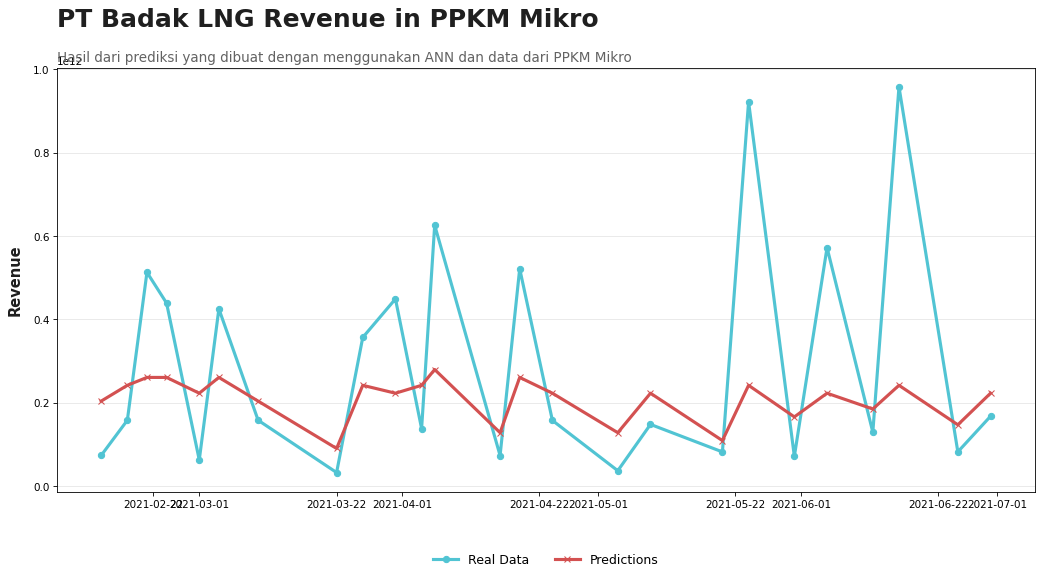

In [163]:
title_ann_standard = 'PT Badak LNG Revenue in PPKM Mikro'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN dan data dari PPKM Mikro'
plot_predictions(date_ppkm_mikro_1,revenue_ppkm_mikro_1_inv, revenue_ppkm_mikro_1_pred_inv, title_ann_standard, subtitle_ann_standard)

## PPKM DARURAT

In [164]:
df_ppkm_darurat = df[df['Kebijakan'] == 'PPKM DARURAT']
df_ppkm_darurat

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
71,PPKM DARURAT,3.0,3.146886e+11,2021-07-03,0.245924
72,PPKM DARURAT,4.0,3.682184e+10,2021-07-07,-0.770655
73,PPKM DARURAT,3.0,3.772735e+11,2021-07-10,0.474891
74,PPKM DARURAT,3.0,4.029332e+10,2021-07-13,-0.757955
75,PPKM DARURAT,1.0,4.859427e+10,2021-07-14,-0.727586
76,PPKM DARURAT,3.0,3.779995e+10,2021-07-17,-0.767077
77,PPKM DARURAT,2.0,4.150306e+10,2021-07-19,-0.753529
78,PPKM DARURAT,1.0,1.318172e+11,2021-07-20,-0.423114


In [173]:
feature_ppkm_darurat_1 = df_ppkm_darurat['Periode (hari)']
revenue_ppkm_darurat_1 = df_ppkm_darurat['Revenue Scaled']

feature_ppkm_darurat_1.shape, revenue_ppkm_darurat_1.shape

((8,), (8,))

### Model

In [166]:
tf.random.set_seed(42)


# Build the model 
model_ppkm_darurat_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_ppkm_darurat_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_ppkm_darurat_1 = model_ppkm_darurat_1.fit(feature_ppkm_darurat_1, revenue_ppkm_darurat_1, batch_size=32, epochs=100, verbose=0, validation_split=0.3, shuffle=False)

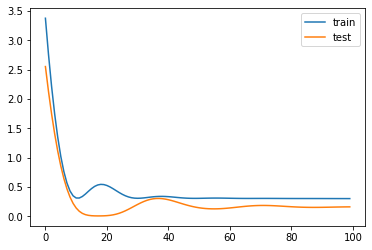

In [167]:
plt.plot(history_ppkm_darurat_1.history['loss'], label='train')
plt.plot(history_ppkm_darurat_1.history['val_loss'], label='test')
plt.legend();

### Evaluation

In [171]:
revenUe_ppkm_darurat_pred_1 = model_ppkm_darurat_1.predict(feature_ppkm_darurat_1)
revenUe_ppkm_darurat_pred_1

array([[-0.277133  ],
       [-0.2768721 ],
       [-0.277133  ],
       [-0.277133  ],
       [-0.27765468],
       [-0.277133  ],
       [-0.27739382],
       [-0.27765465]], dtype=float32)

In [174]:
revenue_ppkm_darurat_1 = revenue_ppkm_darurat_1.to_numpy()
revenue_ppkm_darurat_1

array([ 0.24592371, -0.77065511,  0.47489131, -0.75795467, -0.72758553,
       -0.7670767 , -0.75352881, -0.42311354])

In [175]:
revenue_ppkm_darurat_1_inv = revenue_scaler.inverse_transform(revenue_ppkm_darurat_1.reshape(-1,1))
revenue_ppkm_darurat_1_pred_inv = revenue_scaler.inverse_transform(revenUe_ppkm_darurat_pred_1)
revenue_ppkm_darurat_1_inv.shape, revenue_ppkm_darurat_1_pred_inv.shape 

((8, 1), (8, 1))

In [176]:
MSE_ppkm_darurat_1_Standard = mse(revenue_ppkm_darurat_1_inv, revenue_ppkm_darurat_1_pred_inv)
MAE_ppkm_darurat_1_Standard = mae(revenue_ppkm_darurat_1_inv, revenue_ppkm_darurat_1_pred_inv)

print(f'Mean Squared Error : {MSE_ppkm_darurat_1_Standard}')
print(f'Mean Absolute Error : {MAE_ppkm_darurat_1_Standard}')

Mean Squared Error : 1.8719918916306964e+22
Mean Absolute Error : 130215313408.0


### Visualization

In [177]:
revenue_ppkm_darurat_1_inv = revenue_ppkm_darurat_1_inv.squeeze()
revenue_ppkm_darurat_1_pred_inv = revenue_ppkm_darurat_1_pred_inv.squeeze()
date_ppkm_darurat_1 = df_ppkm_darurat['Tanggal']
date_ppkm_darurat_1 = date_ppkm_darurat_1.to_frame()

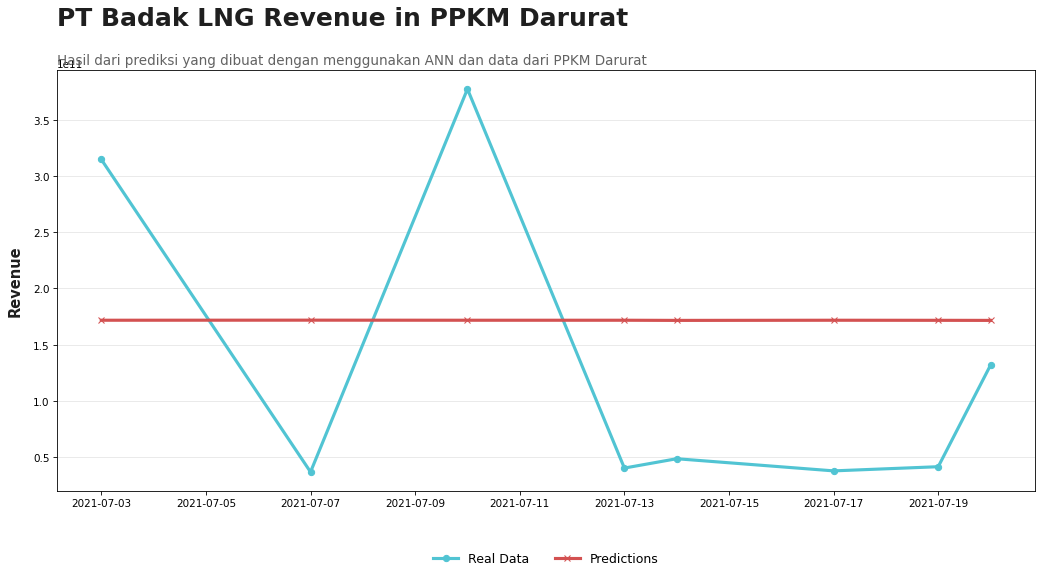

In [178]:
title_ann_standard = 'PT Badak LNG Revenue in PPKM Darurat'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN dan data dari PPKM Darurat'
plot_predictions(date_ppkm_darurat_1,revenue_ppkm_darurat_1_inv, revenue_ppkm_darurat_1_pred_inv, title_ann_standard, subtitle_ann_standard)

## PPKM LEVEL 3 & 4

In [179]:
df_ppkm_34 = df[df['Kebijakan'] == 'PPKM LEVEL 3 & 4']
df_ppkm_34

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
79,PPKM LEVEL 3 & 4,3.0,7.431663e+11,2021-07-23,1.813514
80,PPKM LEVEL 3 & 4,4.0,4.606025e+10,2021-07-27,-0.736856
81,PPKM LEVEL 3 & 4,6.0,3.508969e+10,2021-08-02,-0.776992
82,PPKM LEVEL 3 & 4,5.0,3.969734e+10,2021-08-07,-0.760135
83,PPKM LEVEL 3 & 4,2.0,1.024295e+11,2021-08-09,-0.530629
84,PPKM LEVEL 3 & 4,6.0,4.888114e+10,2021-08-15,-0.726536
85,PPKM LEVEL 3 & 4,4.0,4.675836e+10,2021-08-19,-0.734302
86,PPKM LEVEL 3 & 4,3.0,7.862788e+10,2021-08-22,-0.617707


In [180]:
feature_ppkm_34_1 = df_ppkm_34['Periode (hari)']
revenue_ppkm_34_1 = df_ppkm_34['Revenue Scaled']

feature_ppkm_34_1.shape, revenue_ppkm_34_1.shape

((8,), (8,))

### Model

In [181]:
tf.random.set_seed(42)


# Build the model 
model_ppkm_34_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_ppkm_34_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_ppkm_34_1 = model_ppkm_34_1.fit(feature_ppkm_34_1, revenue_ppkm_34_1, batch_size=32, epochs=100, verbose=0, validation_split=0.3, shuffle=False)

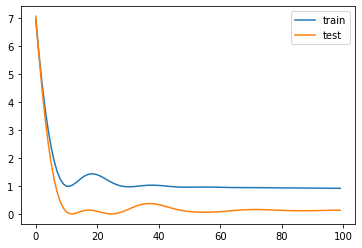

In [182]:
plt.plot(history_ppkm_34_1.history['loss'], label='train')
plt.plot(history_ppkm_34_1.history['val_loss'], label='test')
plt.legend();

### Evaluation

In [183]:
revenUe_ppkm_34_pred_1 = model_ppkm_34_1.predict(feature_ppkm_34_1)
revenUe_ppkm_34_pred_1

array([[-0.18885261],
       [-0.28707832],
       [-0.4835295 ],
       [-0.38530388],
       [-0.09062714],
       [-0.4835295 ],
       [-0.2870782 ],
       [-0.18885256]], dtype=float32)

In [184]:
revenue_ppkm_34_1 = revenue_ppkm_34_1.to_numpy()
revenue_ppkm_34_1

array([ 1.81351442, -0.73685627, -0.77699219, -0.76013506, -0.53062882,
       -0.726536  , -0.73430223, -0.61770722])

In [185]:
revenue_ppkm_34_1_inv = revenue_scaler.inverse_transform(revenue_ppkm_34_1.reshape(-1,1))
revenue_ppkm_34_1_pred_inv = revenue_scaler.inverse_transform(revenUe_ppkm_34_pred_1)
revenue_ppkm_34_1_inv.shape, revenue_ppkm_34_1_pred_inv.shape 

((8, 1), (8, 1))

In [186]:
MSE_ppkm_34_1_Standard = mse(revenue_ppkm_34_1_inv, revenue_ppkm_34_1_pred_inv)
MAE_ppkm_34_1_Standard = mae(revenue_ppkm_34_1_inv, revenue_ppkm_34_1_pred_inv)

print(f'Mean Squared Error : {MSE_ppkm_34_1_Standard}')
print(f'Mean Absolute Error : {MAE_ppkm_34_1_Standard}')

Mean Squared Error : 4.739523396010076e+22
Mean Absolute Error : 159884869632.0


### Visualization

In [187]:
revenue_ppkm_34_1_inv = revenue_ppkm_34_1_inv.squeeze()
revenue_ppkm_34_1_pred_inv = revenue_ppkm_34_1_pred_inv.squeeze()
date_ppkm_34_1 = df_ppkm_34['Tanggal']
date_ppkm_34_1 = date_ppkm_34_1.to_frame()

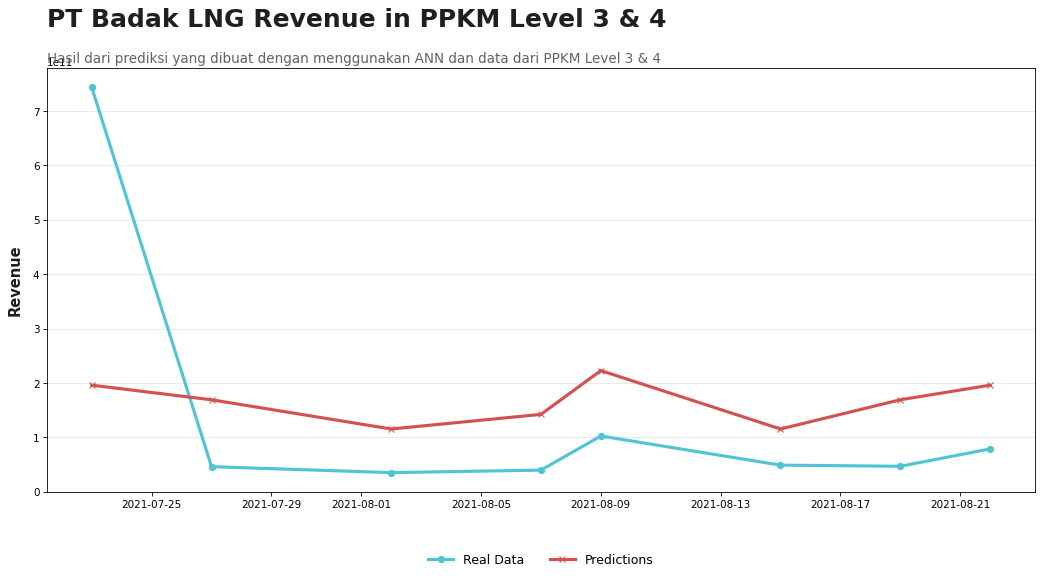

In [188]:
title_ann_standard = 'PT Badak LNG Revenue in PPKM Level 3 & 4'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN dan data dari PPKM Level 3 & 4'
plot_predictions(date_ppkm_34_1,revenue_ppkm_34_1_inv, revenue_ppkm_34_1_pred_inv, title_ann_standard, subtitle_ann_standard)

## PPKM LEVEL 2, 3, & 4

In [189]:
df_ppkm_234 = df[df['Kebijakan'] == 'PPKM LEVEL 2, 3, & 4']
df_ppkm_234

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
87,"PPKM LEVEL 2, 3, & 4",3.0,7.450172e+10,2021-08-25,-0.632803
88,"PPKM LEVEL 2, 3, & 4",6.0,3.437665e+10,2021-08-31,-0.779601
89,"PPKM LEVEL 2, 3, & 4",3.0,3.002385e+10,2021-09-03,-0.795526
90,"PPKM LEVEL 2, 3, & 4",3.0,3.878350e+11,2021-09-06,0.513531
91,"PPKM LEVEL 2, 3, & 4",5.0,3.872531e+10,2021-09-11,-0.763691
92,"PPKM LEVEL 2, 3, & 4",4.0,7.181793e+10,2021-09-15,-0.642622
93,"PPKM LEVEL 2, 3, & 4",4.0,4.041351e+10,2021-09-19,-0.757515
94,"PPKM LEVEL 2, 3, & 4",5.0,3.464876e+10,2021-09-24,-0.778605
95,"PPKM LEVEL 2, 3, & 4",6.0,2.898548e+10,2021-09-30,-0.799325
96,"PPKM LEVEL 2, 3, & 4",7.0,2.594012e+10,2021-10-07,-0.810466


In [190]:
feature_ppkm_234_1 = df_ppkm_234['Periode (hari)']
revenue_ppkm_234_1 = df_ppkm_234['Revenue Scaled']

feature_ppkm_234_1.shape, revenue_ppkm_234_1.shape

((10,), (10,))

### Model

In [191]:
tf.random.set_seed(42)


# Build the model 
model_ppkm_234_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_ppkm_234_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_ppkm_234_1 = model_ppkm_234_1.fit(feature_ppkm_234_1, revenue_ppkm_234_1, batch_size=32, epochs=100, verbose=0, validation_split=0.3, shuffle=False)

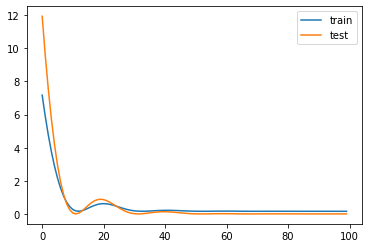

In [192]:
plt.plot(history_ppkm_234_1.history['loss'], label='train')
plt.plot(history_ppkm_234_1.history['val_loss'], label='test')
plt.legend();

### Evaluation

In [193]:
revenUe_ppkm_234_pred_1 = model_ppkm_234_1.predict(feature_ppkm_234_1)
revenUe_ppkm_234_pred_1

array([[-0.46931118],
       [-0.7875584 ],
       [-0.46931118],
       [-0.46931118],
       [-0.6814759 ],
       [-0.57539356],
       [-0.57539356],
       [-0.6814759 ],
       [-0.7875584 ],
       [-0.893641  ]], dtype=float32)

In [194]:
revenue_ppkm_234_1 = revenue_ppkm_234_1.to_numpy()
revenue_ppkm_234_1

array([-0.63280282, -0.77960087, -0.79552564,  0.51353073, -0.76369122,
       -0.64262151, -0.75751493, -0.77860535, -0.79932453, -0.810466  ])

In [195]:
revenue_ppkm_234_1_inv = revenue_scaler.inverse_transform(revenue_ppkm_234_1.reshape(-1,1))
revenue_ppkm_234_1_pred_inv = revenue_scaler.inverse_transform(revenUe_ppkm_234_pred_1)
revenue_ppkm_234_1_inv.shape, revenue_ppkm_234_1_pred_inv.shape 

((10, 1), (10, 1))

In [196]:
MSE_ppkm_234_1_Standard = mse(revenue_ppkm_234_1_inv, revenue_ppkm_234_1_pred_inv)
MAE_ppkm_234_1_Standard = mae(revenue_ppkm_234_1_inv, revenue_ppkm_234_1_pred_inv)

print(f'Mean Squared Error : {MSE_ppkm_234_1_Standard}')
print(f'Mean Absolute Error : {MAE_ppkm_234_1_Standard}')

Mean Squared Error : 8.667537770844709e+21
Mean Absolute Error : 54780219392.0


### Visualization

In [199]:
revenue_ppkm_234_1_inv = revenue_ppkm_234_1_inv.squeeze()
revenue_ppkm_234_1_pred_inv = revenue_ppkm_234_1_pred_inv.squeeze()
date_ppkm_234_1 = df_ppkm_234['Tanggal']
date_ppkm_234_1 = date_ppkm_234_1.to_frame()

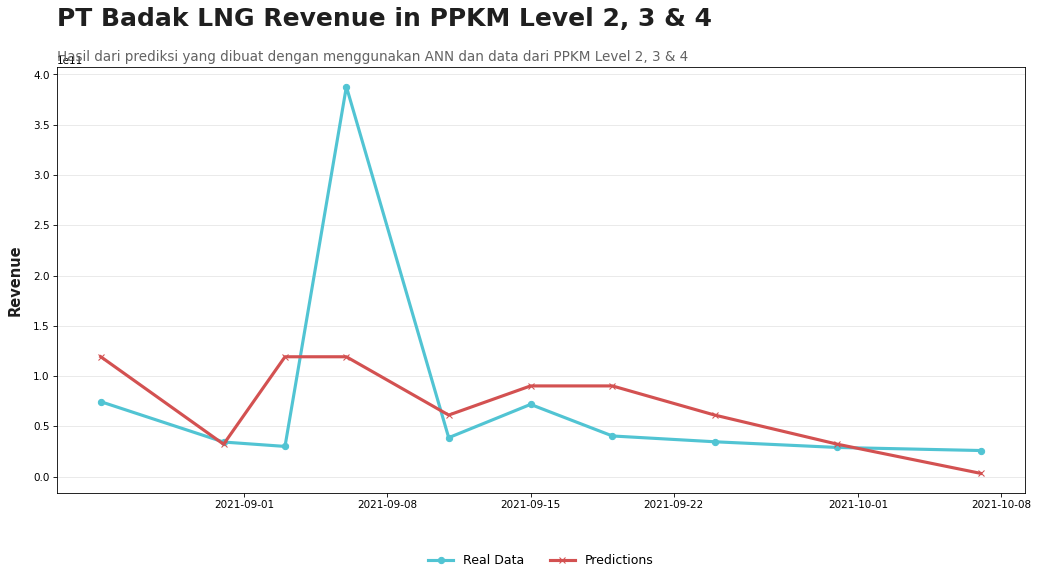

In [200]:
title_ann_standard = 'PT Badak LNG Revenue in PPKM Level 2, 3 & 4'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN dan data dari PPKM Level 2, 3 & 4'
plot_predictions(date_ppkm_234_1,revenue_ppkm_234_1_inv, revenue_ppkm_234_1_pred_inv, title_ann_standard, subtitle_ann_standard)

## PPKM  LEVEL 1, 2, & 3

In [202]:
df_ppkm_123 = df[df['Kebijakan'] == 'PPKM  LEVEL 1, 2, & 3']
df_ppkm_123

,Kebijakan,Periode (hari),Revenue,Tanggal,Revenue Scaled
97,"PPKM LEVEL 1, 2, & 3",12.0,1.732555e+11,2021-10-19,-0.271511
98,"PPKM LEVEL 1, 2, & 3",8.0,3.539399e+10,2021-10-27,-0.775879
99,"PPKM LEVEL 1, 2, & 3",9.0,3.257680e+10,2021-11-05,-0.786186
100,"PPKM LEVEL 1, 2, & 3",3.0,6.923571e+11,2021-11-08,1.627628
101,"PPKM LEVEL 1, 2, & 3",7.0,3.670740e+10,2021-11-15,-0.771074
102,"PPKM LEVEL 1, 2, & 3",8.0,3.308818e+10,2021-11-23,-0.784315
103,"PPKM LEVEL 1, 2, & 3",2.0,9.634531e+10,2021-11-25,-0.552888
104,"PPKM LEVEL 1, 2, & 3",9.0,3.496118e+10,2021-12-04,-0.777462
105,"PPKM LEVEL 1, 2, & 3",8.0,3.284880e+10,2021-12-12,-0.785191
106,"PPKM LEVEL 1, 2, & 3",7.0,1.610741e+11,2021-12-19,-0.316077


In [203]:
feature_ppkm_123_1 = df_ppkm_123['Periode (hari)']
revenue_ppkm_123_1 = df_ppkm_123['Revenue Scaled']

feature_ppkm_123_1.shape, revenue_ppkm_123_1.shape

((10,), (10,))

### Model

In [204]:
tf.random.set_seed(42)


# Build the model 
model_ppkm_123_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_ppkm_123_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_ppkm_123_1 = model_ppkm_123_1.fit(feature_ppkm_123_1, revenue_ppkm_123_1, batch_size=32, epochs=100, verbose=0, validation_split=0.3, shuffle=False)

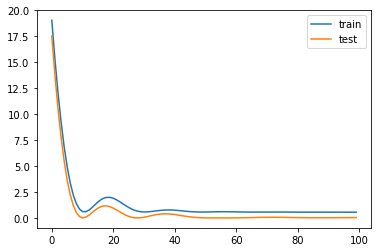

In [205]:
plt.plot(history_ppkm_123_1.history['loss'], label='train')
plt.plot(history_ppkm_123_1.history['val_loss'], label='test')
plt.legend();

### Evaluation

In [206]:
revenUe_ppkm_123_pred_1 = model_ppkm_123_1.predict(feature_ppkm_123_1)
revenUe_ppkm_123_pred_1

array([[-0.66741043],
       [-0.45578277],
       [-0.5086891 ],
       [-0.19124839],
       [-0.40287554],
       [-0.45578277],
       [-0.13834165],
       [-0.5086891 ],
       [-0.45578277],
       [-0.40287554]], dtype=float32)

In [207]:
revenue_ppkm_123_1 = revenue_ppkm_123_1.to_numpy()
revenue_ppkm_123_1

array([-0.27151108, -0.77587893, -0.78618562,  1.62762838, -0.7710738 ,
       -0.78431474, -0.55288778, -0.77746235, -0.78519053, -0.31607668])

In [208]:
revenue_ppkm_123_1_inv = revenue_scaler.inverse_transform(revenue_ppkm_123_1.reshape(-1,1))
revenue_ppkm_123_1_pred_inv = revenue_scaler.inverse_transform(revenUe_ppkm_123_pred_1)
revenue_ppkm_123_1_inv.shape, revenue_ppkm_123_1_pred_inv.shape 

((10, 1), (10, 1))

In [209]:
MSE_ppkm_123_1_Standard = mse(revenue_ppkm_123_1_inv, revenue_ppkm_123_1_pred_inv)
MAE_ppkm_123_1_Standard = mae(revenue_ppkm_123_1_inv, revenue_ppkm_123_1_pred_inv)

print(f'Mean Squared Error : {MSE_ppkm_123_1_Standard}')
print(f'Mean Absolute Error : {MAE_ppkm_123_1_Standard}')

Mean Squared Error : 3.173881888451835e+22
Mean Absolute Error : 125969940480.0


### Visualization

In [212]:
revenue_ppkm_123_1_inv = revenue_ppkm_123_1_inv.squeeze()
revenue_ppkm_123_1_pred_inv = revenue_ppkm_123_1_pred_inv.squeeze()
date_ppkm_123_1 = df_ppkm_123['Tanggal']
date_ppkm_123_1 = date_ppkm_123_1.to_frame()

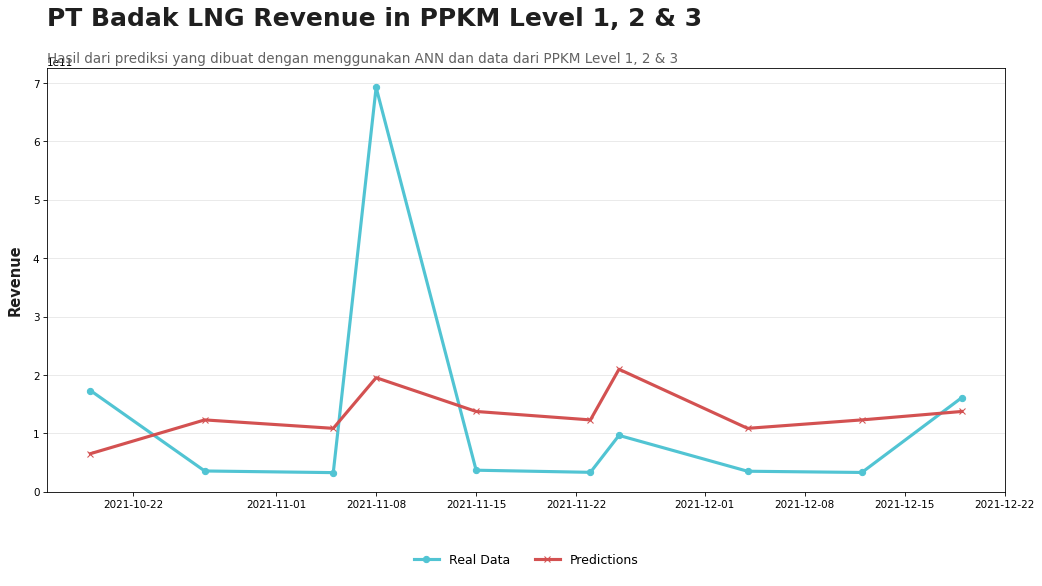

In [213]:
title_ann_standard = 'PT Badak LNG Revenue in PPKM Level 1, 2 & 3'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN dan data dari PPKM Level 1, 2 & 3'
plot_predictions(date_ppkm_123_1,revenue_ppkm_123_1_inv, revenue_ppkm_123_1_pred_inv, title_ann_standard, subtitle_ann_standard)